In [86]:
import shapely
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.optimize import NonlinearConstraint

In [87]:
# initial value
X_MIN = 0
Y_MIN = 0

X_MAX = 100
Y_MAX = 100
UAV_ALTITUDE = 10  # altitude of uav [meter]
MAX_BEAM_ANGLE = 60  # maximum beamforming angle [degree]

# maximum beamforming diameter [meter]
MAX_BEAM_DIAMETER = 2*UAV_ALTITUDE*np.tan(MAX_BEAM_ANGLE*np.pi/180)
RADIUS = 18

NUM_POINT = 13 # adjust accordingly

In [88]:
# define region
region = shapely.geometry.Polygon([
    (X_MIN, Y_MIN),
    (X_MAX, Y_MIN),
    (X_MAX, Y_MAX),
    (X_MIN, Y_MAX)
])

In [89]:
# define objective function
def objective_function(flat_points):

    points = flat_points.reshape(NUM_POINT, 2)

    circles = dict()
    for i, [x, y] in enumerate(points):
        circles[i] = shapely.Point(x, y).buffer(distance=RADIUS, resolution=128)

    total_intersect_area = 0
    for i in range(len(circles)):
        for j in range(len(circles)):
            total_intersect_area += circles[i].intersection(circles[j]).area

    total_intersect_area = total_intersect_area - \
                           len(circles) * circles[0].intersection(circles[0]).area

    return np.array(total_intersect_area)

In [90]:
# define constraint
def constraint(flat_points):

    points = flat_points.reshape(NUM_POINT, 2)

    circles = dict()
    for i, [x, y] in enumerate(points):
        circles[i] = shapely.Point(x, y).buffer(distance=20, resolution=128)

    union_circle = circles[0]
    for i in range(len(circles)):
        union_circle = union_circle.union(circles[i])

    constraint_area = region.intersection(union_circle).area
    return constraint_area

In [91]:
# define initial value
x0 = np.random.uniform(low=0, high=100, size=(NUM_POINT, 2)).reshape(2 * NUM_POINT)

# define boundary
bounds = [(0., 100.)]

# nonlinear constraint
nlc = NonlinearConstraint(constraint, region.area, np.inf)


In [92]:
# minimize objective function
result = minimize(
    fun=objective_function,
    x0=x0,
    bounds=bounds,
    tol=1e-1,
    constraints=nlc,
    options={
        # "maxiter": 500,
        'disp': True,
    }
)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1926.2567507615731
            Iterations: 73
            Function evaluations: 2048
            Gradient evaluations: 73


In [93]:
# test constraint
constraint(result.x)

9999.96266939333

In [94]:
# plot the optimal value
points_opt = result.x.reshape(NUM_POINT, 2)

gu #: 8
gu #: 4
gu #: 9
gu #: 1
gu #: 0
gu #: 6
gu #: 7
gu #: 3
gu #: 2
gu #: 5


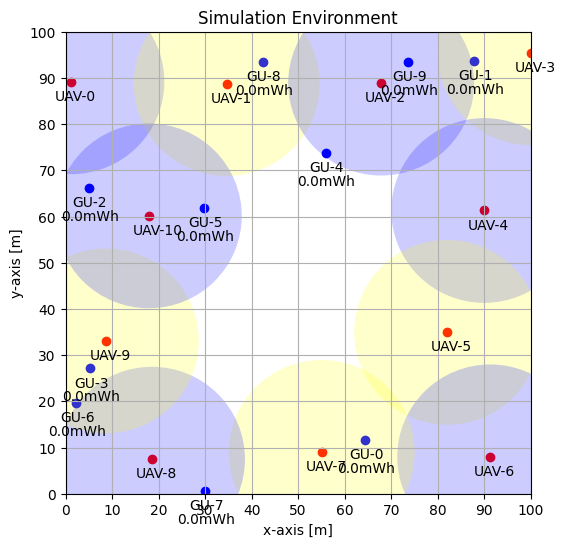

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.patches as mpatches
import openpyxl as xl
import pandas as pd
from scipy.spatial import distance_matrix
import math
def searchGu(x,y):

    tmp_count=0
    count=0
    for k in range(10):
        if x-17<=gu_x[k]<=x+17 and y-17<=gu_y[k]<=y+17:
            if gu_memory[0][k]!=gu_x[k] and gu_memory[1][k]!=gu_y[k]:
                print("gu #: ",end='')
                counter1[0]+=1
                print(k)
                guno[0]=k
                gu_memory[0][k]=gu_x[k]
                gu_memory[1][k]=gu_y[k]
            else:
                continue
def makeBeamCircle(xpos,ypos,maxbeam,color):
    beam_circle = Ellipse(
        xy=(xpos, ypos),
        width=maxbeam,
        height=maxbeam,
        angle=0,
        edgecolor="none",
        facecolor=color,
        alpha=0.2,
    )
    uav_beam = ax.add_patch(beam_circle)
NUM_GU = 10  # number of ground users

X_MIN = 0  # minimum x-axis [meter]
X_MAX = 100  # maximum x-axis [meter]
Y_MIN = 0  # minimum y-axis [meter]
Y_MAX = 100  # maximum y-axis [mseter]

UAV_ALTITUDE = 10  # altitude of uav [meter]
MAX_BEAM_ANGLE = 60  # maximum beamforming angle [degree]

# maximum beamforming diameter [meter]
MAX_BEAM_DIAMETER = 2*UAV_ALTITUDE*np.tan(MAX_BEAM_ANGLE*np.pi/180)


X_GRID = 10  # number of x grid
Y_GRID = 10  # number of y grid


UAV_TX_POWER = 30  # uav's transmit power in [dBm]

#initial variables
t = 0  # time [seconds]

gu_bat = np.zeros((NUM_GU,)) # battery of ground user [mWh]

#generate variables
# generate ground user location randomly x,y,z [meters]
gu_x = np.random.uniform(low=X_MIN, high=X_MAX, size=(NUM_GU,))
gu_y = np.random.uniform(low=Y_MIN, high=Y_MAX, size=(NUM_GU,))
gu_z = np.zeros((NUM_GU,))

# print
gu_x, gu_y, gu_z

# generate meshgrid
tmp_x = np.linspace(X_MIN + X_GRID/2,X_MAX-X_GRID/2,X_GRID)
tmp_y = np.linspace(Y_MIN + Y_GRID/2,Y_MAX-Y_GRID/2,Y_GRID)
GRID = np.array(np.meshgrid(tmp_x, tmp_y))

GRID

# generate uav location

uav_x_pos = 1  # x position of uav 0,1,...,GRID_SIZE-1
uav_y_pos = 0  # y position of uav 0,1,...,GRID_SIZE-1

uav_x = GRID[1, uav_x_pos, uav_y_pos]
uav_y = GRID[0, uav_x_pos, uav_y_pos]
uav_z = UAV_ALTITUDE  # uav's altitude [meter]
uav_x, uav_y, uav_z
fig, ax = plt.subplots(figsize=(6, 6))
gu_memory=np.ones((2,10)) + 10
guno=np.zeros(1)

for i in range(NUM_GU):
    plt.scatter(x=gu_x[i], y=gu_y[i], c="blue")
    plt.text(x=gu_x[i] - 3.5, y=gu_y[i] - 4, s=f"GU-{i}")
    plt.text(x=gu_x[i] - 6, y=gu_y[i] - 7, s=f"{gu_bat[i]}mWh")

counter1=np.zeros(1)
route1=[3,2,10,11,4,5,8,12,9,0,7,6,1]
uavnum=1
count2=1
for i in range(13):
    plt.scatter(x=points_opt[route1[i]][0], y=points_opt[route1[i]][1], c="red")
    ax.text(x=points_opt[route1[i]][0] - 3.5, y=points_opt[route1[i]][1] - 4, s=f"UAV-{i}")
    if count2%2==0:
        makeBeamCircle(points_opt[route1[i]][0], points_opt[route1[i]][1],40,'yellow')
    else:
        makeBeamCircle(points_opt[route1[i]][0], points_opt[route1[i]][1],40,'blue')
    searchGu(points_opt[route1[i]][0],points_opt[route1[i]][1])
    if counter1[0]==10:
        break
    count2+=1
plt.xlabel("x-axis [m]")
plt.ylabel("y-axis [m]")
plt.title("Simulation Environment")
plt.xticks(np.arange(X_MIN, X_MAX + 1, X_GRID))
plt.yticks(np.arange(Y_MIN, Y_MAX + 1, Y_GRID))
plt.xlim(X_MIN, X_MAX)
plt.ylim(Y_MIN, Y_MAX)
plt.grid()
plt.show()
